In [10]:
# !pip install pandas

In [13]:
import pandas
df = pandas.read_csv('../data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [2]:
import pandas as pd
# pandas = 데이터를 로딩하는데 사용하는 패키지
# 판다스라는 패키지를 불러와 pd로 단축 코드로 저장한다

df = pd.read_csv('../data/gapminder.tsv', sep='\t')
# read_csv로 데이터 불러오기 , 중요 = sep = '\t'

print(df.head())
# head, tail / 상위 하위 5개 데이터 불러오기

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [4]:
print(type(df))
# 데이터의 타입 알아보기

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(df.shape)
# 데이터의 모양 가져오기

(1704, 6)


In [9]:
print(df.columns)
# 데이터의 가로열 인덱스 가져오기

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [12]:
print(df['country'])

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object


In [10]:
print(df.dtypes)
# object : 문자열
# 두 개의 문자열, 등 ( 이걸로 분석 기법을 캐치 가능해야 함 )

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [18]:
# 열 단위 데이터 출력하기
country_df = df['country']
print(country_df)

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object


In [19]:
# 출력되는 데이터의 타입은 Series! ( 작은 df )
print(type(country_df))



<class 'pandas.core.series.Series'>


In [21]:
print(country_df.head())
print(country_df.tail())

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [26]:
subset = df[['country', 'continent','year']]
print(subset)


          country continent  year
0     Afghanistan      Asia  1952
1     Afghanistan      Asia  1957
2     Afghanistan      Asia  1962
3     Afghanistan      Asia  1967
4     Afghanistan      Asia  1972
...           ...       ...   ...
1699     Zimbabwe    Africa  1987
1700     Zimbabwe    Africa  1992
1701     Zimbabwe    Africa  1997
1702     Zimbabwe    Africa  2002
1703     Zimbabwe    Africa  2007

[1704 rows x 3 columns]


In [29]:
print(df.loc[5])
# 열에서 x번째 줄 데이터만 불러오기 ( index 기반)
print(type(df.loc[5]))
# 인덱스가 5인 데이터 출력

country      Afghanistan
continent           Asia
year                1977
lifeExp           38.438
pop             14880372
gdpPercap      786.11336
Name: 5, dtype: object
<class 'pandas.core.series.Series'>


In [30]:
# 데이터 여러개 가져오기
print(df.loc[[5, 29, 1]])

        country continent  year  lifeExp       pop    gdpPercap
5   Afghanistan      Asia  1977   38.438  14880372   786.113360
29      Algeria    Africa  1977   58.014  17152804  4910.416756
1   Afghanistan      Asia  1957   30.332   9240934   820.853030


### 예습!

In [4]:
# 데이터의 프레임의 마지막 행 데이터 추출
# shape[0]에 데이터의 행 크기가 저장되어 있다는 점을 이용한다!! (-1 처리!)

number_of_rows = df.shape[0]
last_low_index = number_of_rows - 1
print(df.loc[last_low_index])

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


In [5]:
# tail() 메소드를 활용하여 데이터프레임의 마지막 행 데이터 추출하기!
# tail()의 N 값을 이용한다!! (1 전달)
print(df.tail(n=1))

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [6]:
# 인덱스가 여러개인 값을 한번에 추출하기
print(df.loc[[92,11,11]])

        country continent  year  lifeExp       pop     gdpPercap
92      Bahrain      Asia  1992   72.601    529491  19035.579170
11  Afghanistan      Asia  2007   43.828  31889923    974.580338
11  Afghanistan      Asia  2007   43.828  31889923    974.580338


In [7]:
# 중요!
# tail메소드와 loc 메소드가 반환하는 데이터의 타입은 다르다!!
print(type(df.loc[0]))
print(type(df.tail(n=1)))

# loc는 시리즈( 하나의 행 ). tail은 데이터프레임 반환

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [9]:
# iloc는 리스트 형식으로 처리한다! ( 마지막 데이터를 가져오려면 -1!! )
# loc랑 다르게 행 번호를 통해 추출하기 때문에 리스트형도 사용이 가능하다!!
# 그러나 없는 값을 요청하면 오류 발생!!
print(df.iloc[-1])
# 행은 앞에, 열은 뒤에 ":"를 붙여 주면 모든 데이터를 가져올지 여부를 설정할 수 있음!! ( loc, iloc )b

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


In [11]:
# iloc 여러 데이터 한번에 출력하기
# loc와 동일하다!!
print(df.iloc[[99,38,22]])

       country continent  year  lifeExp       pop    gdpPercap
99  Bangladesh      Asia  1967   43.453  62821884   721.186086
38      Angola    Africa  1962   34.000   4826015  4269.276742
22     Albania    Europe  2002   75.651   3508512  4604.211737


### 추출할 데이터의 행과 열을 지정하기
iloc, loc 모두 두 속성의 행을 먼저 지정하고 열을 지정한다!!  
예시: df.loc[[행], [열]], df.iloc[[행], [열]]

In [18]:
# 슬라이싱 구문 데이터 추출하기
subset = df.loc[:, ['year','country']]
print(subset.head())

# 열의 인덱스에 해당하는 모든 행을 가져오기!!

# 여기서 [1, 3, -1]은 행(세로)가 아닌 열(가로)의 인덱스!( 문자형이 아닌 정수로 지정한 것 !!)
subset = df.iloc[:, [1, 3, -1]]
print(subset.head())

   year      country
0  1952  Afghanistan
1  1957  Afghanistan
2  1962  Afghanistan
3  1967  Afghanistan
4  1972  Afghanistan
  continent  lifeExp   gdpPercap
0      Asia   28.801  779.445314
1      Asia   30.332  820.853030
2      Asia   31.997  853.100710
3      Asia   34.020  836.197138
4      Asia   36.088  739.981106


In [23]:
# range 메소드를 활용한 리스트 생성하기
small_list = list(range(5))
print(small_list)
# 0~4 까지 리스트 생성
# ex) [0,1,2,3,4]

print(type(small_list))
# small_list의 타입 확인하기

subset = df.iloc[:, small_list]
print(subset.head())

# 중요해!!
# subset = df.iloc[:, [small_list]]
# 할 경우 빈 리스트 안에 리스트가 들어가 리스트의 값이 0이 되기 때문에 오류가 발생한다!!

small_range = list(range(3, 6))
# range(3,6) = [3,4,5]
print(df.iloc[:, small_range].head())

[0, 1, 2, 3, 4]
<class 'list'>
       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460
   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106


In [28]:
# range를 이용한 0~5 사이의 짝수 데이터 얻기

print(df.iloc[:, (list(range(0,6,2)))].head())
# range 특성으로 0, 5, 2를 지불함으로서 0~4까지, 2씩 증가

print(list(range(0, 5, 2)))
print(type(df.iloc[:, (list(range(0,5,2)))].head()))
# iloc 반환이기에(행이 한개 이상) = 데이터 프레임 타입 사용

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460
[0, 2, 4]
<class 'pandas.core.frame.DataFrame'>


In [31]:
# 슬라이싱 구문 활용하기
# ex ) range(3) = :3

print(df.iloc[:, :3].head())
# range와는 달리 변환하는 과정이 필요 없기 떄문에 활용한다!!

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [33]:
# 슬라이싱 구문을 활용하여 range(0,6,2)와 같은 결과 얻기
print(df.iloc[:, 0:6:2].head())

# 특이한 점은 range와는 다르게 end_point 값이 +1이 되어야 한다!!

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


In [34]:
# iloc 속성으로 0, 99, 999 번 행의 0,3,5 열 데이터 출력하기!!
# 행, 세로, - 열, 가로

print(df.iloc[[0,99,999], [0,3,5]])
# 얘는 값이 하나가 아니라서 리스트로 넘겨야 해!!

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [35]:
# 위와 같은 방법으로 iloc를 사용하면 간편하지만, 나중에 이게 어떤 데이터인지 모를 수 있음!
# 큰 규모의 데이터 분석 프로젝트는 loc속성이 더 유용!
print(df.loc[[0,99,999], ['country', 'lifeExp']])

         country  lifeExp
0    Afghanistan   28.801
99    Bangladesh   43.453
999     Mongolia   51.253


In [38]:
# 연습하기
print(df.loc[31:37, ['country', 'gdpPercap']])
# loc는 인덱스 기준이기에 실제로는 32~38 사이!!

    country    gdpPercap
31  Algeria  5681.358539
32  Algeria  5023.216647
33  Algeria  4797.295051
34  Algeria  5288.040382
35  Algeria  6223.367465
36   Angola  3520.610273
37   Angola  3827.940465


### 기초통계 계산하기

In [41]:
print(df.head(n=10))
# 인덱스 기준, head의 값을 0~9까지 출력하기!!

print(df.loc[0:9, :])
# 리스트 슬라이싱을 이용한 데이터 출력!

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
5  Afghanistan      Asia  1977   38.438  14880372  786.113360
6  Afghanistan      Asia  1982   39.854  12881816  978.011439
7  Afghanistan      Asia  1987   40.822  13867957  852.395945
8  Afghanistan      Asia  1992   41.674  16317921  649.341395
9  Afghanistan      Asia  1997   41.763  22227415  635.341351
       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afgha

In [42]:
# lifeExp 열을 연도별로 그룹화하여 평균 계산하기
print(df.groupby('year')['lifeExp'].mean())

# df에서 년도별로 전부 묶어서 수명의 평균

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [45]:
# 연습, 국가별 수명의 평균
print(df.groupby('country')['lifeExp'].mean().head(n=10))
# 국가별 수명의 평균

country
Afghanistan    37.478833
Albania        68.432917
Algeria        59.030167
Angola         37.883500
Argentina      69.060417
Australia      74.662917
Austria        73.103250
Bahrain        65.605667
Bangladesh     49.834083
Belgium        73.641750
Name: lifeExp, dtype: float64


In [51]:
# 연습2, 년도별 국가별 수명의 평균
print(df.groupby(['country','year'])['lifeExp'].mean())

country      year
Afghanistan  1952    28.801
             1957    30.332
             1962    31.997
             1967    34.020
             1972    36.088
                      ...  
Zimbabwe     1987    62.351
             1992    60.377
             1997    46.809
             2002    39.989
             2007    43.487
Name: lifeExp, Length: 1704, dtype: float64


In [56]:
# 그룹화한 데이터의 자료형은 data.frame.groupBy
print(type(df.groupby('year')))
print(type(df.groupby(['country','year'])['lifeExp'].mean()))

# 그룹별로 묶은 것은 dataframeGroupBy
# 마지막처럼 lifeExp의 Mean평균을 찾은 것은 series

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.series.Series'>


In [57]:
# 그룹화한 데이터프레임의 메모리 주소 얻기!!
# <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000220E2BED150> 여기서 0x00000220E2BED150가 메모리 주소!!
print(df.groupby('year'))

In [60]:
# 그룹화한 시리즈에서 그룹화한 시리즈 얻기!
dgf = df.groupby('year')
print(type(dgf['lifeExp']))
print(dgf['lifeExp'].mean().head())

<class 'pandas.core.groupby.generic.SeriesGroupBy'>
year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
Name: lifeExp, dtype: float64


In [63]:
# lifeExp, gdpPercap 열의 평균값을 연도, 지역별로 그룹화하여 한번에 계산
print(df.groupby(['year', 'continent'])[['lifeExp','gdpPercap']].head())
# pandas에서 여러 개의 값을 줄 때는 , 반드시 리스트로 넘겨서 줄 것!!


      lifeExp     gdpPercap
0      28.801    779.445314
1      30.332    820.853030
2      31.997    853.100710
3      34.020    836.197138
4      36.088    739.981106
...       ...           ...
1099   74.320  19007.191290
1100   76.330  18363.324940
1101   77.550  21050.413770
1102   79.110  23189.801350
1103   80.204  25185.009110

[264 rows x 2 columns]


In [67]:
# 데이터의 빈도수 계산하기
print(df.groupby('continent')['country'].nunique())
# nunique는 함수로서 ()가 필요하다!!
# 데이터의 빈도수를 세는 것이다.

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


<Axes: xlabel='year'>

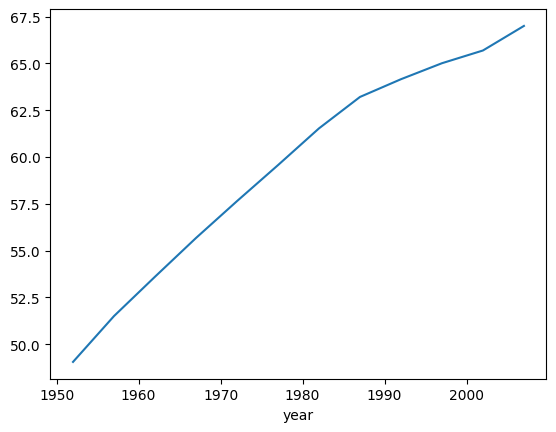

In [68]:
# matplotlib inline = 주피터 노트북에서 그래프를 그리기 위해 활용하는 매직함수!!
%matplotlib inline

import matplotlib.pyplot as plt
group_data = df.groupby('year')['lifeExp'].mean()
group_data.plot()


<Axes: xlabel='year'>

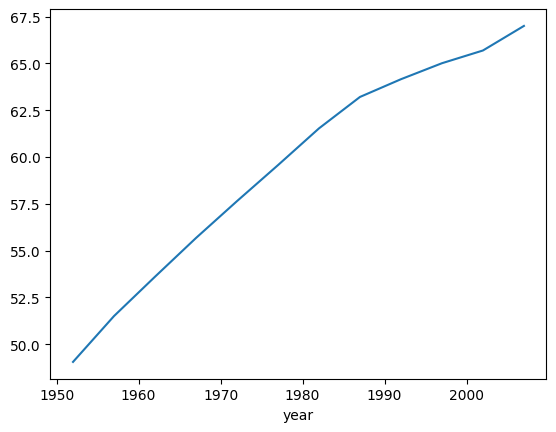

In [70]:
grouped_data = df.groupby('country')['lifeExp'].mean()
group_data.plot()